In [11]:
import librosa
import keras
import keras.layers as L
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
"""!pip install librosa --user
import sys
sys.path.insert(0, "/home/jheuristic/.local/lib/python3.6/site-packages/")"""

You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
y, sr = librosa.load("/home/jheuristic/data/Test/009count.mid.wav")
step=sr*25.0/1000
step=int(step)
spectrogram=librosa.feature.melspectrogram(y,sr,n_mels=216,hop_length=step)

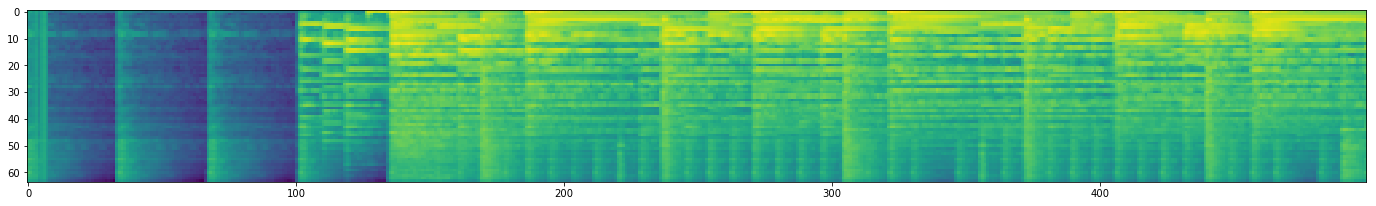

In [15]:
plt.figure(figsize=(24,8))
start = 0
plt.imshow(np.log(spectrogram[:,start:start+500]))

In [1]:
class NotesInInteval:
    num_notes = 127+1
    
    def __init__(self):
        pass
    
    @classmethod
    def load(cls, filename):
        obj = cls()
        
        ev = pd.read_csv(filename)
        notes=[]
        for i in range(len(ev["type"])):
            notes.append([ev["pitch"][i], ev["type"][i], ev["tick"][i]])
        notes = sorted(notes, key=lambda note: note[2])
        
        c = cls.num_notes
        n = int(len(notes)/2)
        
        M = [[0 for i in range(2*n)] for j in range(c)]
        bal = [0 for i in range(c)]
        obj.time = []
        for i in range(2*n):
            if(str(notes[i][1]) == 'True'):
                bal[notes[i][0]] += 1
            else:
                bal[notes[i][0]] -= 1
            M[notes[i][0]][i] = bal[notes[i][0]]
            obj.time.append(notes[i][2])
        
        obj.M_st = [SegmentTree(i) for i in M]
        
        return obj
        
    def get_notes_in_interval(self, start, stop):
        if(start > stop):
            (start, stop) = (stop, start)
        start_index = 0
        stop_index = len(self.time)-1

        if(start >= self.time[0]):
            start_index = bisect.bisect_left(self.time,
                                             self.time[bisect.bisect_right(self.time, start)-1])

        if(stop >= self.time[0]):
            stop_index = bisect.bisect_left(self.time,
                                            self.time[bisect.bisect_right(self.time, stop)-1])

        plnotes = (self.M_st[i].query(start_index, stop_index, "max") for i in range(self.num_notes))
        plnotes = [min(x, 1) for x in plnotes]

        return plnotes

In [17]:
"""
data=pd.read_csv("/home/jheuristic/data/Test/009count.mid.csv")
notes=[]
for i in range(len(data["type"])):
    if(data["type"][i]=="True"):
        #print(data["pitch"][i])
        notes.append([data["pitch"][i],data["tick"][i]])
notes=sorted(notes,key=lambda note: note[1])"""

In [ ]:
model=keras.models